**Importing Libraries**

In [ ]:
# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and for Plottings
import matplotlib.pyplot as plt

# Pickle Library for Saving the Model
import pickle

# RE Library for Regular Expression
import re

# NLTK Library for Natural Language Processing
import nltk
nltk.download('stopwords') # Downloading the Stopwords

# Stopwords for removing stopwords in the Text
from nltk.corpus import stopwords

# PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# CountVectorizer for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

#Frequency counter of Iterable input
from collections import Counter

#Multinomial Naïve Bayes Model
from sklearn.naive_bayes import MultinomialNB

#Classification Report too evaluate the performance of Classification Model
from sklearn.metrics import classification_report


# Accuracy Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Reading informations in the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
spam = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spam.csv", encoding='latin1')

**Checking for null values in Data**

In [ ]:
spam.isnull().sum()


,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


**Checking the First Five Values in the Data**


In [ ]:
spam.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Checking the Last Five Values in the Data**

In [ ]:
spam.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


**Selecting the required Columns**


In [ ]:
spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Dimensions of the Dataset**

In [ ]:
spam.shape


(5572, 2)

**Checking for the classes in the Data**

In [ ]:
spam.groupby('label').size()

,0
label,
ham,4825
spam,747


### Plotting

**Plotting the Label in the Dataset**

<Axes: xlabel='label'>

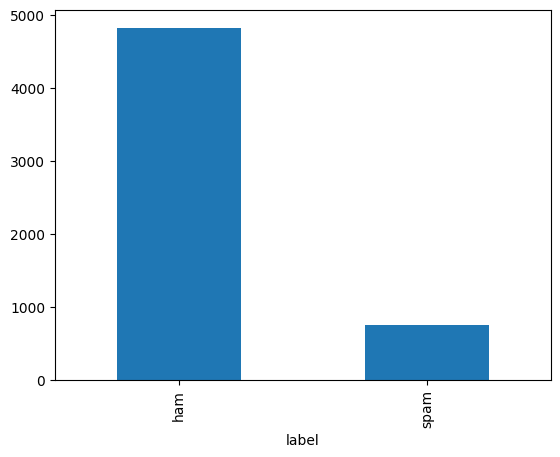

In [ ]:
spam['label'].value_counts().plot(kind='bar')

### NLP

**Preprocessing the Text in the Dataset**

In [ ]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

**Creating Bag of Words Model**

In [ ]:
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values

### Data Modeling

**Splitting the Dataset into Training and Testing Set**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

### Model Building

##Creating the Models

**Creating Random Forest Classifier Funtion**

In [ ]:
def random_forest_classifier(X_train, Y_train, X_test, n_trees=10, max_depth=None, max_features=None):
    """
    Implements Random Forest Classifier.

    Parameters:
        X_train (ndarray): Training data features.
        Y_train (ndarray): Training data labels.
        X_test (ndarray): Testing data features.
        n_trees (int): Number of trees in the forest.
        max_depth (int): Maximum depth of individual trees.
        max_features (int): Number of features to sample per tree.

    Returns:
        predictions (list): Predictions for the test set.
    """
    def build_tree(X, y, max_depth=None):

        # Stopping condition: If all labels are the same, max depth is reached, or no data left
        if len(y) == 0 or len(set(y)) == 1 or max_depth == 0:
        # If y is empty, return a default value (e.g., 0 or 1, depending on the majority class in the dataset)
          return Counter(y).most_common(1)[0][0] if len(y) > 0 else 0

        # Find the best split
        feature_idx, threshold = best_split(X, y)
        if feature_idx is None:
          return Counter(y).most_common(1)[0][0]

        # Split the data
        left_idxs, right_idxs = split(X[:, feature_idx], threshold)
        left = build_tree(X[left_idxs], y[left_idxs], None if max_depth is None else max_depth - 1)
        right = build_tree(X[right_idxs], y[right_idxs], None if max_depth is None else max_depth - 1)

        # Return tree structure
        return {"feature_idx": feature_idx, "threshold": threshold, "left": left, "right": right}

    def best_split(X, y):
        best_gain = -1
        split_idx, split_threshold = None, None
        n_features = X.shape[1] if max_features is None else min(max_features, X.shape[1])
        feature_indices = np.random.choice(X.shape[1], n_features, replace=False)

        for i in feature_indices:
            thresholds = np.unique(X[:, i])
            for threshold in thresholds:
                gain = information_gain(X[:, i], y, threshold)
                if gain > best_gain:
                    best_gain, split_idx, split_threshold = gain, i, threshold
        return split_idx, split_threshold

    def information_gain(X_column, y, threshold):
        parent_entropy = entropy(y)
        left_idxs, right_idxs = split(X_column, threshold)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        left_entropy = entropy(y[left_idxs])
        right_entropy = entropy(y[right_idxs])
        child_entropy = (len(left_idxs) / len(y)) * left_entropy + (len(right_idxs) / len(y)) * right_entropy
        return parent_entropy - child_entropy

    def split(X_column, threshold):
        left_idxs = np.where(X_column <= threshold)[0]
        right_idxs = np.where(X_column > threshold)[0]
        return left_idxs, right_idxs

    def entropy(y):
        proportions = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])

    return [build_tree(X_train[np.random.choice(X_train.shape[0], X_train.shape[0], replace=True)],
                       Y_train[np.random.choice(X_train.shape[0], X_train.shape[0], replace=True)],
                       max_depth)
            for _ in range(n_trees)]


def predict_tree(tree, data_point):
  if not isinstance(tree, dict):
      return tree
  feature_idx = tree["feature_idx"]
  threshold = tree["threshold"]
  if data_point[feature_idx] <= threshold:
      return predict_tree(tree["left"], data_point)
  else:
      return predict_tree(tree["right"], data_point)


**Creating Decision Tree classifier**

In [ ]:
def build_decision_tree(X, y, max_depth=None, current_depth=0):
    """
    Recursively builds a decision tree.

    Parameters:
        X (ndarray): Features of the dataset.
        y (ndarray): Labels of the dataset.
        max_depth (int): Maximum depth of the tree.
        current_depth (int): Current depth of the tree (used for recursion).

    Returns:
        dict: Tree structure with decisions at each node.
    """
    # Stopping conditions
    if len(set(y)) == 1:  # If all labels are the same, stop
        return Counter(y).most_common(1)[0][0]
    if max_depth is not None and current_depth >= max_depth:  # If max depth is reached
        return Counter(y).most_common(1)[0][0]

    # Finding the best split
    feature_idx, threshold = best_split(X, y)
    if feature_idx is None:  # If no valid split, return the majority class
        return Counter(y).most_common(1)[0][0]

    # Split the dataset based on the best feature and threshold
    left_idxs, right_idxs = split(X[:, feature_idx], threshold)
    left_tree = build_decision_tree(X[left_idxs], y[left_idxs], max_depth, current_depth + 1)
    right_tree = build_decision_tree(X[right_idxs], y[right_idxs], max_depth, current_depth + 1)

    # Return the decision tree structure
    return {"feature_idx": feature_idx, "threshold": threshold, "left": left_tree, "right": right_tree}

def best_split(X, y):
    """
    Finds the best feature and threshold to split the data based on information gain.

    Parameters:
        X (ndarray): Features of the dataset.
        y (ndarray): Labels of the dataset.

    Returns:
        tuple: feature index and threshold for the best split.
    """
    best_gain = -1
    best_split = None
    n_features = X.shape[1]

    for feature_idx in range(n_features):
        thresholds = np.unique(X[:, feature_idx])
        for threshold in thresholds:
            gain = information_gain(X[:, feature_idx], y, threshold)
            if gain > best_gain:
                best_gain = gain
                best_split = (feature_idx, threshold)

    return best_split

def information_gain(X_column, y, threshold):
    """
    Calculates the information gain for a given feature and threshold.

    Parameters:
        X_column (ndarray): A single feature column of the dataset.
        y (ndarray): Labels of the dataset.
        threshold (float): The threshold to split the feature.

    Returns:
        float: Information gain.
    """
    parent_entropy = entropy(y)
    left_idxs, right_idxs = split(X_column, threshold)

    if len(left_idxs) == 0 or len(right_idxs) == 0:  # Avoiding empty splits
        return 0

    left_entropy = entropy(y[left_idxs])
    right_entropy = entropy(y[right_idxs])
    child_entropy = (len(left_idxs) / len(y)) * left_entropy + (len(right_idxs) / len(y)) * right_entropy

    return parent_entropy - child_entropy

def entropy(y):
    """
    Calculates the entropy of the dataset.

    Parameters:
        y (ndarray): Labels of the dataset.

    Returns:
        float: Entropy value.
    """
    proportions = np.bincount(y) / len(y)
    return -np.sum([p * np.log2(p) for p in proportions if p > 0])

def split(X_column, threshold):
    """
    Splits the data based on a given feature and threshold.

    Parameters:
        X_column (ndarray): A single feature column of the dataset.
        threshold (float): The threshold to split the data.

    Returns:
        tuple: Indices of the left and right splits.
    """
    left_idxs = np.where(X_column <= threshold)[0]
    right_idxs = np.where(X_column > threshold)[0]
    return left_idxs, right_idxs

def predict_decision_tree(tree, X):
    """
    Predicts the label for a given data point using the decision tree.

    Parameters:
        tree (dict): The decision tree model.
        X (ndarray): A single data point (feature values).

    Returns:
        int: Predicted label (0 or 1).
    """
    if not isinstance(tree, dict):  # Leaf node
        return tree
    feature_idx = tree["feature_idx"]
    threshold = tree["threshold"]
    if X[feature_idx] <= threshold:
        return predict_decision_tree(tree["left"], X)
    else:
        return predict_decision_tree(tree["right"], X)

def decision_tree_classifier(X_train, Y_train, X_test, n_trees=1, max_depth=None):
    """
    Builds and trains a decision tree classifier.

    Parameters:
        X_train (ndarray): Training data features.
        Y_train (ndarray): Training data labels.
        X_test (ndarray): Test data features.
        n_trees (int): Number of decision trees (not used here, but can be extended for Random Forest).
        max_depth (int): Maximum depth of the tree.

    Returns:
        list: Predictions for the test set.
    """
    # Build the decision tree
    tree = build_decision_tree(X_train, Y_train, max_depth)

    # Predict using the decision tree
    predictions = [predict_decision_tree(tree, x) for x in X_test]
    return predictions

**Training the Models**

In [ ]:
#Model 1 - Random Forest Classifier
trees = random_forest_classifier(X_train, Y_train, X_test, n_trees=10, max_depth=10)

# Model 2 - Decision Tree Classifier
rf_preds2 = build_decision_tree(X_train, Y_train, max_depth=10)

# Model 3 - Multinomial Naïve Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

MultinomialNB()

**Prediction**

In [ ]:
rf_preds = []
for i in range(len(X_test)):
    tree_preds = [predict_tree(tree, X_test[i]) for tree in trees]  # Get predictions from each tree
    rf_preds.append(Counter(tree_preds).most_common(1)[0][0])  # Majority vote for final prediction
pred2 = [predict_decision_tree(rf_preds2, x) for x in X_test]
pred3 = model3.predict(X_test)

**Testing the Model**

In [ ]:
# Model 1 - Random Forest Classifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, rf_preds))
print("Accuracy: ", accuracy_score(Y_test, rf_preds))
print("--------------------------------")

# Model 2 - Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2))
print("--------------------------------")

# Model 3 - Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3))

Random Forest Classifier
Confusion Matrix: 
[[965   0]
 [150   0]]
Accuracy:  0.8654708520179372
--------------------------------
Decision Tree Classifier
Confusion Matrix: 
[[962   3]
 [ 44 106]]
Accuracy:  0.957847533632287
--------------------------------
Multinomial Naïve Bayes
Confusion Matrix: 
[[955  10]
 [ 10 140]]
Accuracy:  0.9820627802690582


**Confusion Matrix**

<Axes: >

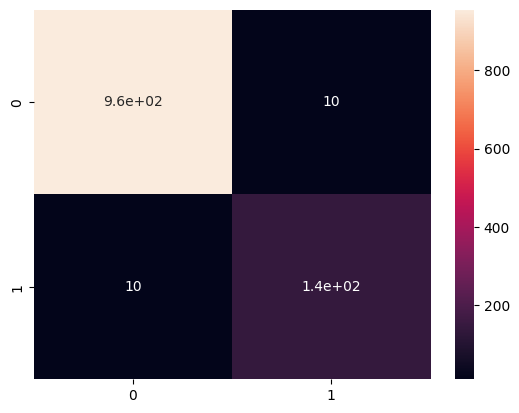

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred3)

import seaborn as sns
sns.heatmap(cm, annot=True)


In [ ]:
report1 = classification_report(Y_test, rf_preds, zero_division=1)
print("Classification Report for RFC \n", report1)
report2 = classification_report(Y_test, pred2, zero_division=1)
print("Classification Report for DTC \n", report2)
report3 = classification_report(Y_test, pred3, zero_division=1)
print("Classification Report for MNB \n", report3)

Classification Report for RFC 
               precision    recall  f1-score   support

       False       0.87      1.00      0.93       965
        True       1.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.93      0.50      0.46      1115
weighted avg       0.88      0.87      0.80      1115

Classification Report for DTC 
               precision    recall  f1-score   support

       False       0.96      1.00      0.98       965
        True       0.97      0.71      0.82       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115

Classification Report for MNB 
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       965
        True       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.9

**Best Model is Multinomial Naïve Bayes**

### Saving Models

Saving all the Models

In [ ]:
pickle.dump(trees, open("RFC.pkl", 'wb'))
pickle.dump(rf_preds2, open("DTC.pkl", 'wb'))
pickle.dump(model3, open("MNB.pkl", 'wb'))

##Function to Preprocess and Predict


In [ ]:
def predict_spam_or_ham(input_message):
    # Preprocess the input message
    review = re.sub('[^a-zA-Z]', ' ', input_message)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)

    # Vectorize the processed message
    input_data = cv.transform([review]).toarray()

    # Predict using all models
    rf_preds = [predict_tree(tree, input_data[0]) for tree in trees]
    pred1 = Counter(rf_preds).most_common(1)[0][0]
    pred2 = predict_decision_tree(rf_preds2, input_data[0])
    pred3 = model3.predict(input_data)[0]

    # Output results
    print(f"Random Forest Prediction: {'Spam' if pred1 else 'Ham'}")
    print("Decision Tree Prediction: ", "Spam" if pred2 else "Ham")
    print("Multinomial Naïve Bayes Prediction: ", "Spam" if pred3 else "Ham")

    # Return the best model's prediction
    return "Spam" if pred3 else "Ham"  # Assuming MNB is the best model

**Test Example**

In [ ]:
user_message = "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now."
result = predict_spam_or_ham(user_message)
print("\nFinal Prediction: ", result)

Random Forest Prediction: Ham
Decision Tree Prediction:  Ham
Multinomial Naïve Bayes Prediction:  Spam

Final Prediction:  Spam


##Predicting Ham/Spam

In [ ]:

user_message = input("Enter a message to check if it's S
pam or Ham: ")
result = predict_spam_or_ham(user_message)
print("\nFinal Prediction: ", result)

Enter a message to check if it's Spam or Ham: Hello!
Random Forest Prediction: Ham
Decision Tree Prediction:  Ham
Multinomial Naïve Bayes Prediction:  Ham

Final Prediction:  Ham
